# Multiple outputs using Keras Functional API
- Wine Quality Dataset from UCI machine learning repository
    - Reference: https://archive.ics.uci.edu/dataset/186/wine+quality 
- Two datasets, Classification Red or White wine

## Imports

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools

## Load datasets
1. white wine data preprocess
2. red wine data preprocess

### Preprocess two datasets

In [2]:
url = './winequality-white.csv'
white_df = pd.read_csv(url, sep=';')
white_df["is_red"] = np.zeros(len(white_df), dtype='float32')
white_df = white_df.drop_duplicates(keep='first')
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0.0
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,0.0


In [3]:
print(white_df.alcohol[0])
print(white_df.alcohol[100])

# EXPECTED OUTPUT
# 8.8
# 9.1

8.8
9.1


In [4]:
url2 = './winequality-red.csv'
red_df = pd.read_csv(url2, sep=';')
red_df["is_red"] = np.ones(len(red_df), dtype='float64')
red_df = red_df.drop_duplicates(keep='first')
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1.0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1.0


In [5]:
print(red_df.alcohol[0])
print(red_df.alcohol[100])

# EXPECTED OUTPUT
# 9.4
# 10.2

9.4
10.2


In [6]:
df = pd.concat([red_df,white_df], ignore_index=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1.0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1.0


In [7]:
df.shape

(5320, 13)

In [8]:
print(df.alcohol[0])
print(df.alcohol[100])

# EXPECTED OUTPUT
# 9.4
# 9.5

9.4
9.5


### Imbalance Data 

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,5320.0,7.215179,1.319671,3.80000,6.4000,7.00000,7.70000,15.90000
volatile acidity,5320.0,0.344130,0.168248,0.08000,0.2300,0.30000,0.41000,1.58000
citric acid,5320.0,0.318494,0.147157,0.00000,0.2400,0.31000,0.40000,1.66000
residual sugar,5320.0,5.048477,4.500180,0.60000,1.8000,2.70000,7.50000,65.80000
chlorides,5320.0,0.056690,0.036863,0.00900,0.0380,0.04700,0.06600,0.61100
free sulfur dioxide,5320.0,30.036654,17.805045,1.00000,16.0000,28.00000,41.00000,289.00000
total sulfur dioxide,5320.0,114.109023,56.774223,6.00000,74.0000,116.00000,153.25000,440.00000
density,5320.0,0.994535,0.002966,0.98711,0.9922,0.99465,0.99677,1.03898
pH,5320.0,3.224664,0.160379,2.72000,3.1100,3.21000,3.33000,4.01000
sulphates,5320.0,0.533357,0.149743,0.22000,0.4300,0.51000,0.60000,2.00000


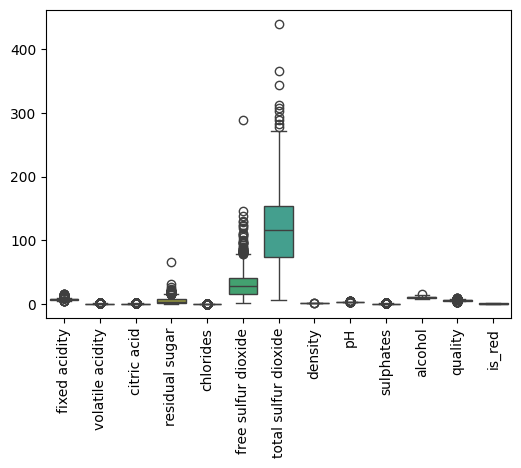

In [10]:
import seaborn as sns
# 绘制箱形图
plt.figure(figsize=(6, 4))  # 调整大小
sns.boxplot(data=df)
plt.xticks(rotation=90)  # 旋转 x 轴的标签，以便它们更易读
plt.show()

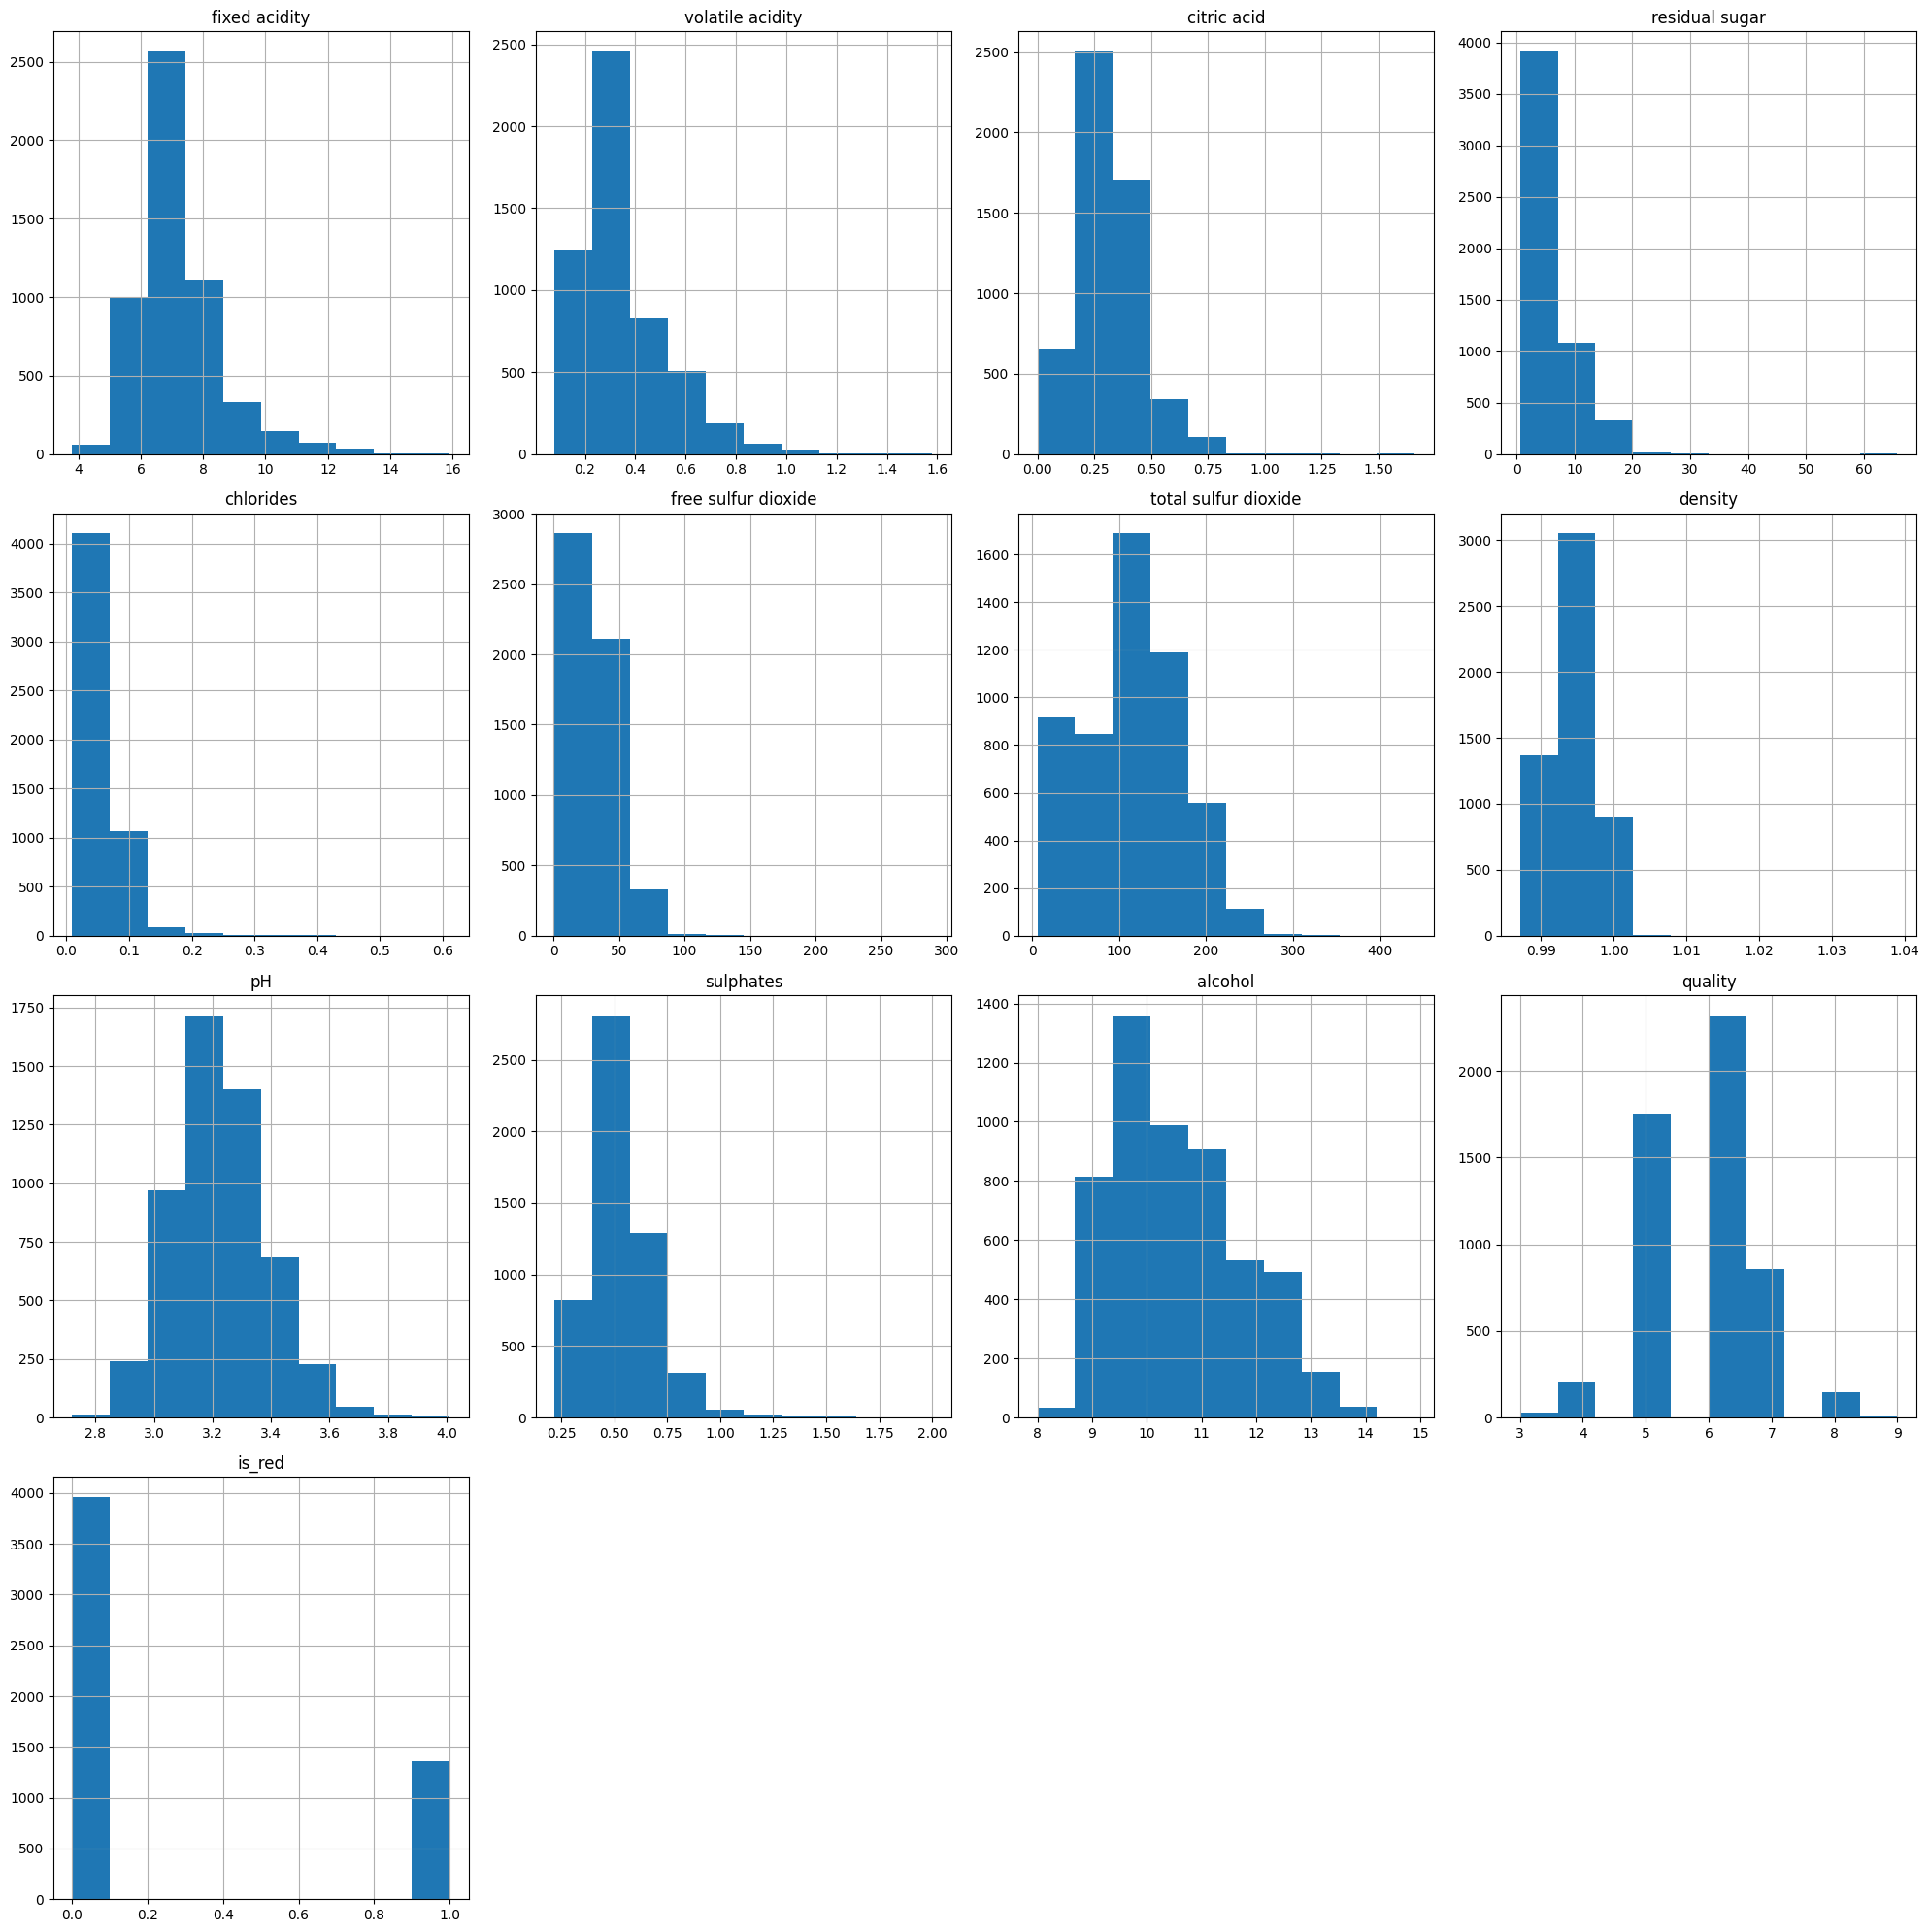

In [11]:
# 设置子图的布局，例如 4x4
rows = 4
cols = 4
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 20)) # 调整大小以适应您的屏幕

# 迭代 DataFrame 的列并在子图中画直方图
for i, column in enumerate(df.columns):
    # 计算当前列在子图网格中的位置
    row = i // cols
    col = i % cols

    # 在对应的子图中画直方图
    ax = axes[row, col]
    df[column].hist(ax=ax)
    ax.set_title(column)

# 隐藏剩下的空子图
for j in range(i+1, rows*cols):
    axes[j // cols, j % cols].axis('off')

# 调整布局以防止子图之间的重叠
plt.tight_layout()
plt.show()

Removing data belonging to all classes except those > 4 and < 8.

In [12]:
df = df[(df['quality']>4) & (df['quality']<8)]
df['quality'].value_counts()
df = df.reset_index(drop=True)

In [13]:
print(df.alcohol[0])
print(df.alcohol[100])

# EXPECTED OUTPUT
# 9.4
# 10.9

9.4
10.9


<Axes: >

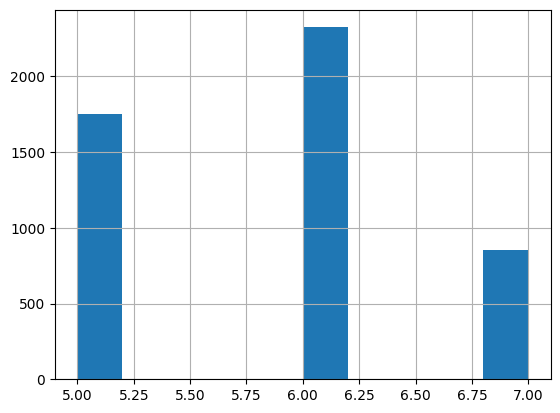

In [14]:
df['quality'].hist()

### Train/Test data split

In [50]:
train, test = train_test_split(df, test_size=0.2, random_state=1)
train, val = train_test_split(train, test_size=0.2, random_state=1)
print("train:",train.shape)
print("val:",val.shape)
print("test:",test.shape)

train: (3155, 13)
val: (789, 13)
test: (987, 13)


### Process the labels
- two outputs: store the label columns is_red and quality separately from the feature columns.

In [51]:
def format_output(data):
    is_red = data.pop("is_red")
    is_red = np.array(is_red)
    data["quality"] = data["quality"].astype("float32")
    quality = data.pop("quality")
    quality = np.array(quality)

    return (quality, is_red)

In [52]:
#labels ready
train_Y = format_output(train)
val_Y = format_output(val)
test_Y = format_output(test)

### Normalize 
- using the train mean/std to normalize

In [54]:
train_stats = train.describe().T
train_stats

,count,mean,std,min,25%,50%,75%,max
fixed acidity,3155.0,7.221616,1.325297,3.80000,6.40000,7.00000,7.7000,15.60000
volatile acidity,3155.0,0.338929,0.162476,0.08000,0.23000,0.29000,0.4000,1.24000
citric acid,3155.0,0.321569,0.147970,0.00000,0.25000,0.31000,0.4000,1.66000
residual sugar,3155.0,5.155911,4.639632,0.60000,1.80000,2.80000,7.6500,65.80000
chlorides,3155.0,0.056976,0.036802,0.01200,0.03800,0.04700,0.0660,0.61100
free sulfur dioxide,3155.0,30.388590,17.236784,1.00000,17.00000,28.00000,41.0000,131.00000
total sulfur dioxide,3155.0,115.062282,56.706617,6.00000,75.00000,117.00000,156.0000,344.00000
density,3155.0,0.994633,0.003005,0.98711,0.99232,0.99481,0.9968,1.03898
pH,3155.0,3.223201,0.161272,2.72000,3.11000,3.21000,3.3300,4.01000
sulphates,3155.0,0.534051,0.149149,0.22000,0.43000,0.51000,0.6000,1.95000


In [55]:
def norm(x):
    return (x - train_stats['mean'])/train_stats['std']

In [56]:
#normalize the data X
norm_train_X = norm(train)
norm_val_X = norm(val)
norm_test_X = norm(test)

check visualization if all x-axis is around 0

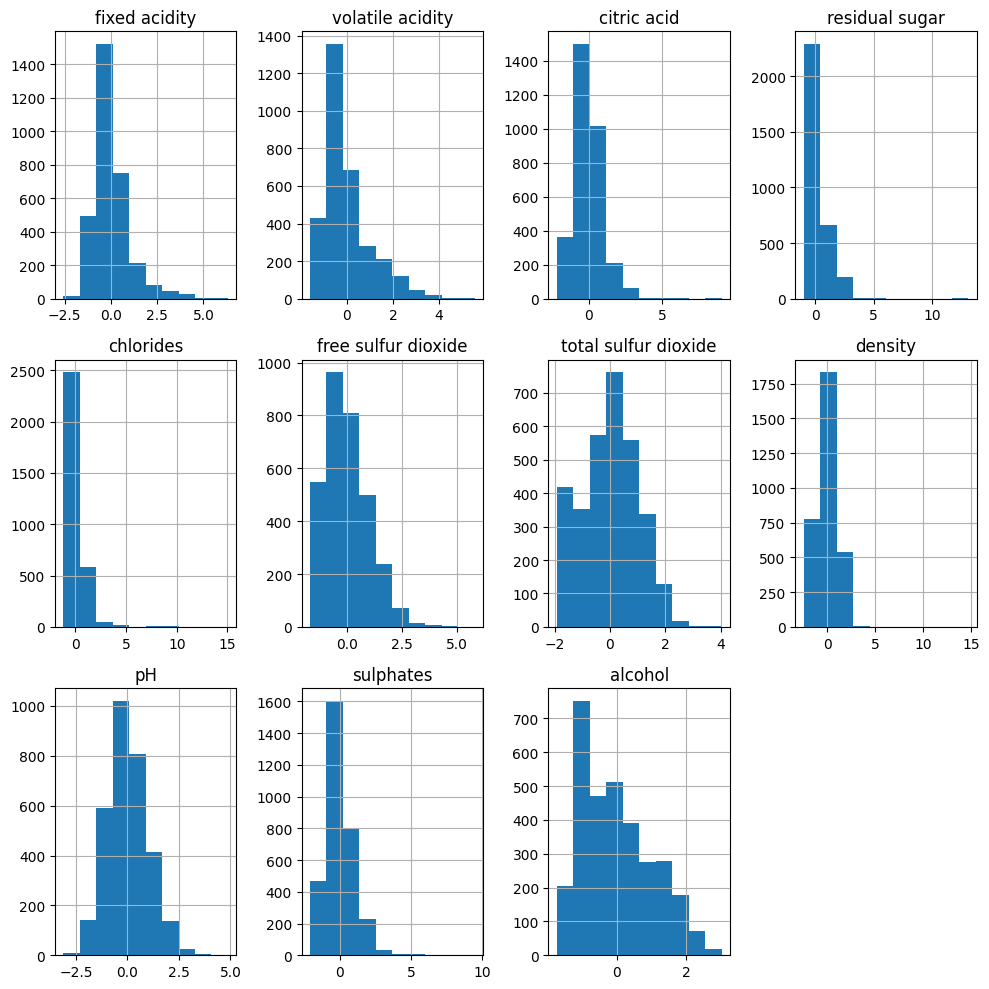

In [57]:
# 设置子图的布局，例如 4x4
rows = 3
cols = 4
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(10, 10)) # 调整大小以适应您的屏幕

# 迭代 DataFrame 的列并在子图中画直方图
for i, column in enumerate(norm_train_X.columns):
    # 计算当前列在子图网格中的位置
    row = i // cols
    col = i % cols

    # 在对应的子图中画直方图
    ax = axes[row, col]
    norm_train_X[column].hist(ax=ax)
    ax.set_title(column)

# 隐藏剩下的空子图
for j in range(i+1, rows*cols):
    axes[j // cols, j % cols].axis('off')

# 调整布局以防止子图之间的重叠
plt.tight_layout()
plt.show()

## Model building

### Base model

In [58]:
def base_model(inputs):
    # connect a Dense layer with 128 neurons and a relu activation
    x = tf.keras.layers.Dense(128, tf.keras.activations.relu)(inputs)
    
    # connect another Dense layer with 128 neurons and a relu activation
    x = tf.keras.layers.Dense(128, tf.keras.activations.relu)(x)
    return x

### Final model
- multiple outputs (is_red, quality)

In [59]:
def final_model(inputs):
    x = base_model(inputs)

    wine_quality = tf.keras.layers.Dense(units=1, name="wine_quality")(x)

    wine_type = tf.keras.layers.Dense(units=1, 
                                      activation=tf.keras.activations.sigmoid, 
                                      name="wine_type")(x)
    
    model = tf.keras.models.Model(inputs, [wine_quality, wine_type])

    return model

### Compile final model
- rms
- multiple outputs -> multiple metrics/accuracy

In [60]:
norm_train_X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
225,0.210054,1.914565,-0.956741,0.397464,0.842996,-0.196591,-0.371425,1.503235,0.972264,1.581966,-0.956534
3557,-0.695404,-0.424239,-0.213347,1.518243,-0.352585,1.659904,1.427306,1.060647,-0.515907,-0.898768,-1.476170
3825,1.190966,-0.424239,-0.483672,-0.033604,-0.896032,1.253796,-0.283252,-0.709707,-2.190100,-0.295346,0.775586
1740,-0.619949,0.683616,-1.700136,-0.874188,-0.732998,-1.182853,0.281056,-1.375253,-1.570029,-1.703331,0.255950
1221,-0.016311,1.175995,-1.294648,-0.680207,0.027827,-0.718730,-1.641119,0.365151,-0.081857,0.978544,-0.523504


In [61]:
inputs = tf.keras.layers.Input(shape=(11,))
rms = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model = final_model(inputs)

model.compile(optimizer=rms,
             loss = {'wine_type' : 'binary_crossentropy',
                    'wine_quality' : 'mse'
                    },
              metrics = {'wine_type' : tf.keras.metrics.BinaryAccuracy(name="binary_accuracy"),
                         'wine_quality' : tf.keras.metrics.RootMeanSquaredError(name='rmse')
                        }
             )
            

## Model training

In [62]:
history = model.fit(norm_train_X, train_Y, epochs=40, 
                   validation_data=(norm_val_X, val_Y))

Epoch 1/40
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 31.7041 - wine_quality_rmse: 5.5685 - wine_type_binary_accuracy: 0.7440 - val_loss: 19.2493 - val_wine_quality_rmse: 4.3133 - val_wine_type_binary_accuracy: 0.7313
Epoch 2/40
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - loss: 16.0404 - wine_quality_rmse: 3.9197 - wine_type_binary_accuracy: 0.7353 - val_loss: 7.9006 - val_wine_quality_rmse: 2.6960 - val_wine_type_binary_accuracy: 0.7326
Epoch 3/40
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - loss: 6.4082 - wine_quality_rmse: 2.4175 - wine_type_binary_accuracy: 0.7449 - val_loss: 3.4737 - val_wine_quality_rmse: 1.7077 - val_wine_type_binary_accuracy: 0.7719
Epoch 4/40
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 3.2854 - wine_quality_rmse: 1.6818 - wine_type_binary_accuracy: 0.7796 - val_loss: 2.6942 - val_wine_quality_rmse: 1.5024 - val_wine_type_binary_accuracy: 0.8606
Epoch 5/40
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - loss: 2.6417 - wine_quality_rmse: 1.5140 - wine_type_bina

In [64]:
model.metrics_names

['loss', 'compile_metrics']

In [65]:
# Gather the validation data metrics
loss, wine_quality_rmse, wine_type_accuracy = model.evaluate(x=norm_val_X, y=val_Y)

print()
print(f'loss: {loss}')
print(f'wine_quality_rmse: {wine_quality_rmse}')
print(f'wine_type_accuracy: {wine_type_accuracy}')

# EXPECTED VALUES
# ~ 0.30 - 0.38
# ~ 0.50 - 0.62
# ~ 0.97 - 1.0

# Example:
#0.3657050132751465
#0.5885359048843384
#0.9974651336669922

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - loss: 0.3920 - wine_quality_rmse: 0.6039 - wine_type_binary_accuracy: 0.9966

loss: 0.3914794921875
wine_quality_rmse: 0.6003632545471191
wine_type_accuracy: 0.9949302673339844


## Model performance analysis

### Predict

In [66]:
predictions = model.predict(norm_test_X)
quality_pred = predictions[0]
type_pred = predictions[1]
print(quality_pred[0])
print(type_pred[0])
# EXPECTED OUTPUT
# 5.4 - 6.0
# close to zero

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step
[5.4897103]
[0.00311994]


### Visualization
- plot metrics

In [75]:
def plot_metrics(metrics, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metrics],color='blue', label=metrics)
    plt.plot(history.history['val_'+metrics], color='red', label='val_'+metrics)

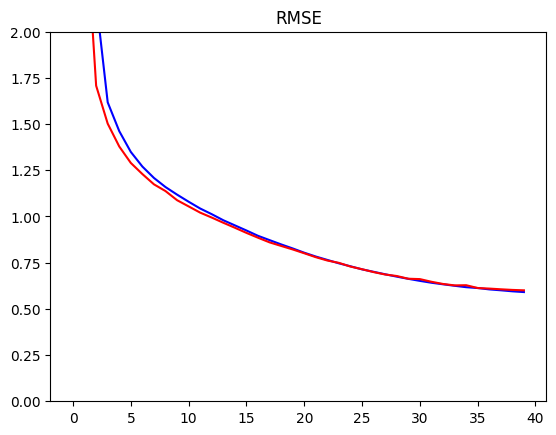

In [76]:
plot_metrics('wine_quality_rmse','RMSE',2)

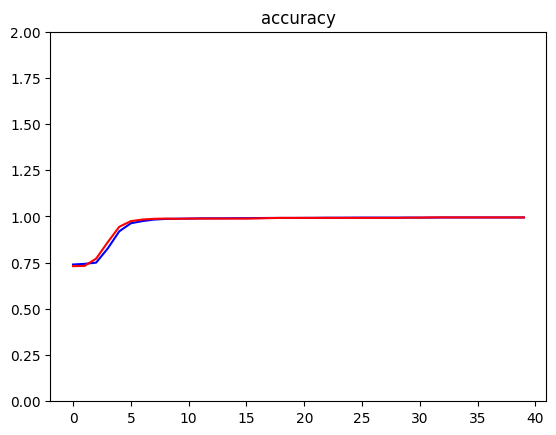

In [77]:
plot_metrics('wine_type_binary_accuracy', 'accuracy', 2)

- confusion matrix

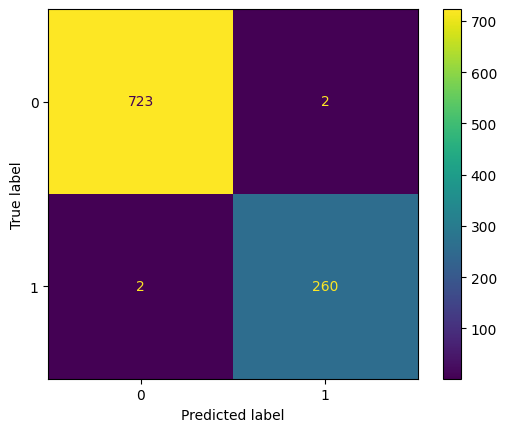

In [88]:
cm = confusion_matrix(test_Y[1], np.round(type_pred), labels=[0,1])
display = ConfusionMatrixDisplay(cm, display_labels=[0,1])
display.plot();

- scatter plot

In [91]:
def plot_diff(y_true, y_pred, title):
    plt.title(title)
    plt.scatter(y_true, y_pred)
    plt.xlabel("true values")
    plt.ylabel("predictions")
    plt.axis('equal')
    plt.axis('square')
    plt.plot([-100, 100], [-100, 100])
    return plt

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/pyplot.py'>

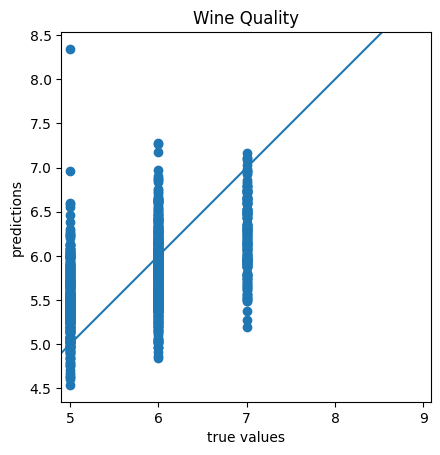

In [92]:
plot_diff(test_Y[0], quality_pred, "Wine Quality")